# **Details About the Dataset**
 ***Census Income***

 Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.

Predict whether income exceeds $50K/yr based on census data.

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

---

Instances - 48842

Features - 14


#Importing the Dataset from **UCI**




In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

''' Source: https://github.com/uci-ml-repo/ucimlrepo '''

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

' Source: https://github.com/uci-ml-repo/ucimlrepo '

#Dataset Information
1.   Numerical - 6
2.   Categorical - 8

So, Totally 13 features or Columns  are there in the dataset.




In [2]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [3]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Information about 'y' dependent variable:

In [4]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [5]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

''' There is some noise in the dataset with fullstop "." which makes the pre-defined function to believe it as it has 4 unique variable , whereas it only has 2.'''


#Importing needed Packages


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

# Converting the noisy data in the dependent variable



In [7]:
y_mod= y['income']
for i in range(len(y_mod)):
  if y_mod[i]=="<=50K.":
    y_mod[i]="<=50K"
  if y_mod[i]==">50K.":
    y_mod[i]=">50K"

<ipython-input-7-3a8f0aa11c79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_mod[i]="<=50K"
<ipython-input-7-3a8f0aa11c79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_mod[i]=">50K"


In [8]:
# This converts the array into dataframe
Y=y_mod.to_frame(name='income')


**Now Let's handle numerical features in dependent variables**

#Finding and handling the Missing data


Convert empty data to standard null values

In [9]:
X.replace({'?':np.nan},inplace=True)

<ipython-input-9-37eaac7aa2c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({'?':np.nan},inplace=True)


In [10]:
#Finding Total missing values
X.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

Using Mode value method to fill-in the missing values ( which uses highest occurrence value )




In [11]:
X['workclass'].fillna(X['workclass'].mode().values[0],inplace=True)
X['occupation'].fillna(X['occupation'].mode().values[0],inplace=True)
X['native-country'].fillna(X['native-country'].mode().values[0],inplace=True)

<ipython-input-11-112f24929e45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].fillna(X['workclass'].mode().values[0],inplace=True)
<ipython-input-11-112f24929e45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].fillna(X['occupation'].mode().values[0],inplace=True)
<ipython-input-11-112f24929e45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'].fillna(X['native-country'].mode().valu

In [12]:
X.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

# Checking the distribution of independent variables (Numerical Features)


<Figure size 800x500 with 0 Axes>

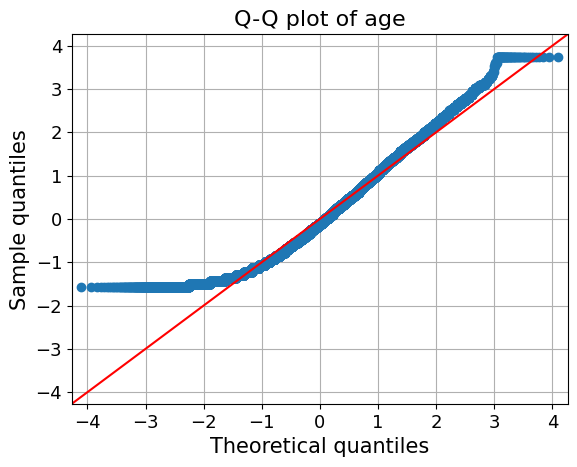

<Figure size 800x500 with 0 Axes>

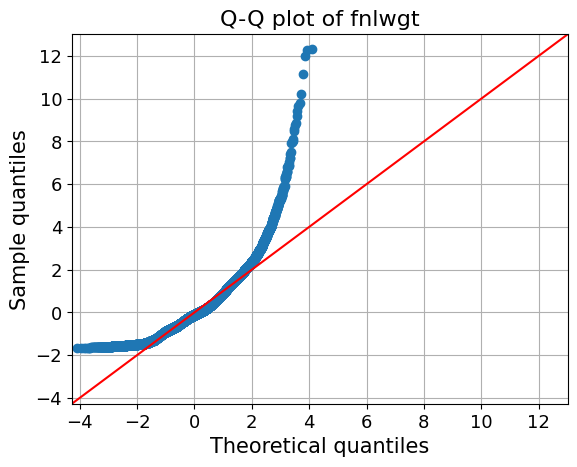

<Figure size 800x500 with 0 Axes>

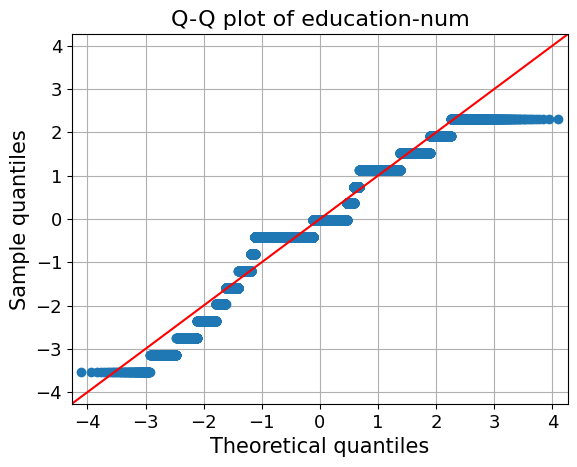

<Figure size 800x500 with 0 Axes>

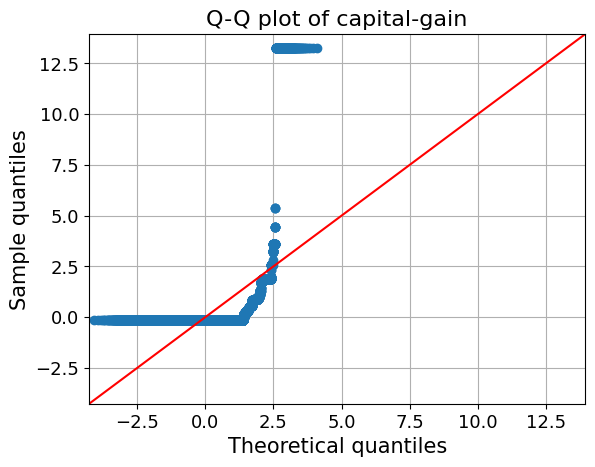

<Figure size 800x500 with 0 Axes>

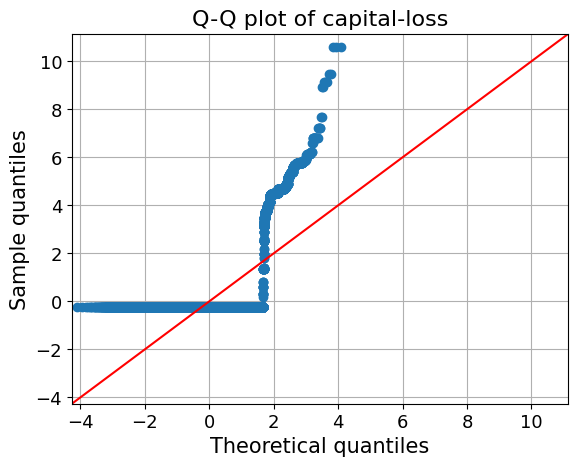

<Figure size 800x500 with 0 Axes>

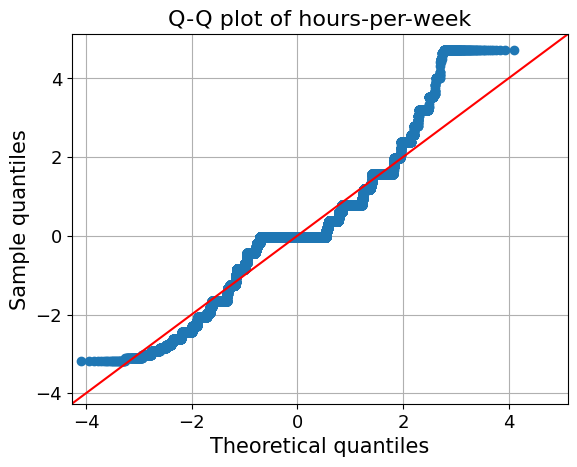

In [13]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = X[
    ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

1.   **Age** - It might resemble a normal distribution, the heavier tails suggest that the overall distribution of age in this dataset is not perfectly normal.
2.   **Fnlwgt** - The distribution is heavily right-skewed which means that the bulk of the data is concentrated on the left with a long tail stretching to the right. It seems like a Logarithamic distibution.
3.   **Education-num** - It is not a normal distribution but the variable is not continuous but categorical with an order.
4.   **Capital-gain** - This distribution is highly right-skewed with many outliers at the higher end.
5.   **Capital-loss** - It is similar to Capital gain but has high outliers
6.   **Hours-per-week** - The distribution bit similar like normal but not perfectly normal.



Let's check their distribution

Ploting a graph to visualize the distribution of the elements

<Figure size 1500x600 with 0 Axes>

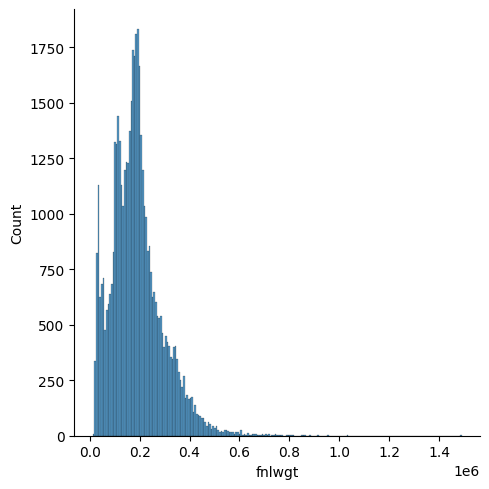

In [14]:
plt.figure(figsize=(15,6))
sns.displot(X['fnlwgt'],kde=False)
plt.show()

<Figure size 1500x600 with 0 Axes>

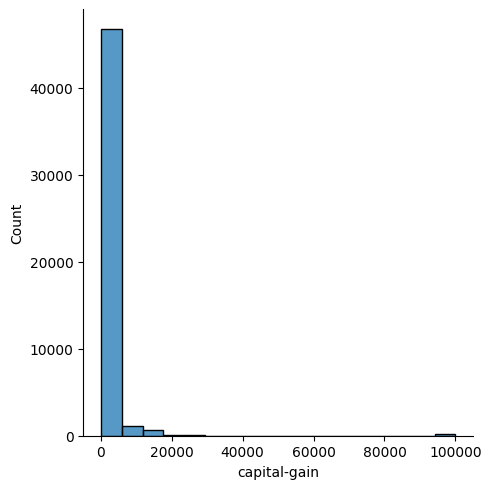

In [15]:
plt.figure(figsize=(15,6))
sns.displot(X['capital-gain'],kde=False)
plt.show()

<Figure size 1500x600 with 0 Axes>

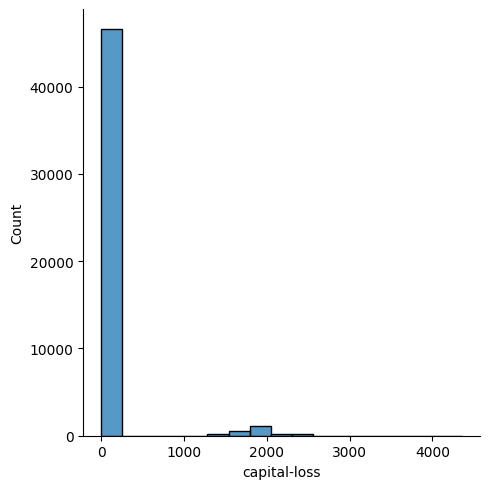

In [16]:
plt.figure(figsize=(15,6))
sns.displot(X['capital-loss'],kde=False)
plt.show()

# Correlation


In [17]:
X.corr()

<ipython-input-17-6b9de402e4ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<ipython-input-18-a2ca540c5f40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),annot=True)


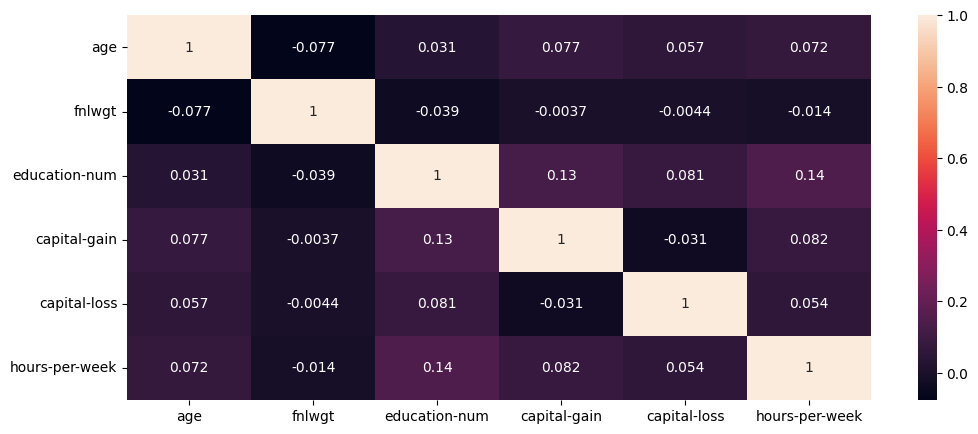

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(X.corr(),annot=True)
plt.show()

Creating Copy of the dataset

In [19]:
df=X.copy(deep=True)

# Label Encoding the categorical variable in the dataframe



In [20]:
columns_to_encode = [ 'workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in columns_to_encode:
    df[col] = df[col].astype(str)


In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())
df = pd.concat([df, encoded_df],axis=1 )
'''source: Bard.google.com'''

'source: Bard.google.com'

In [22]:
df=df.drop(columns=columns_to_encode)
'''Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html  '''

'Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html  '

In [23]:
from sklearn.preprocessing import LabelEncoder

column_to_encode = ['income']
l = LabelEncoder()
for column in column_to_encode:
    Y[column] = l.fit_transform(Y[column])
Y.tail(10)

,income
48832,0
48833,0
48834,0
48835,0
48836,0
48837,0
48838,0
48839,0
48840,0
48841,1


In [25]:
data=pd.concat([df,Y],axis=1)
inde=df.columns

In [27]:
data=data.dropna()

In [28]:
data.reset_index(drop=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,38,215646,9,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,53,234721,7,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,28,338409,13,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
48838,64,321403,9,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
48839,38,374983,13,0,0,50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
48840,44,83891,13,5455,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 106 entries, age to income
dtypes: float64(99), int64(7)
memory usage: 39.5 MB


In [30]:
data.isna().sum()

age                               0
fnlwgt                            0
education-num                     0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
income                            0
Length: 106, dtype: int64

In [31]:
import statsmodels.api as sm

model = sm.Logit(
    data['income'],
    data[ [*inde] ],
).fit()

# Print out the statistics
model.summary()

         Current function value: 0.318219
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48745
Method:                           MLE   Df Model:                           96
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.4217
Time:                        23:03:53   Log-Likelihood:                -15542.
converged:                      False   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
age                                           0.0221      0.001     16.741      0.000       0.019       0.025
fnlwgt                                     7.579e-07   1.39e-07      5.452      0.000    4.85e-07    1.03e-06
education-num                                 0.1079   1.88e+04   5.72e-06      1.000   -3.69e+04    3.69e+04
capital-gain                                  0.0003   8.44e-06     37.628      0.000       0.000       0.000
capital-loss                                  0.0006   3.02e-05     21.453      0.000       0.001       0.001
hours-per-week                                0.0308      0.001     23.836      0.000       0.028       0.033
workclass_Federal-gov                         4.5413        nan        nan        nan         nan         nan
workclass_Local-gov                           3.9468        nan        nan        nan         nan         nan
workclass_Never-worked                      -36.9551   1.23e+09     -3e-08      1.000   -2.41e+09    2.41e+09
workclass_Private                             3.9699        nan        nan        nan         nan         nan
workclass_Self-emp-inc                        4.1684        nan        nan        nan         nan         nan
workclass_Self-emp-not-inc                    3.4973        nan        nan        nan         nan         nan
workclass_State-gov                           3.7637        nan        nan        nan         nan         nan
workclass_Without-pay                         3.1676        nan        nan        nan         nan         nan
education_10th                               -0.9947   1.04e+06  -9.61e-07      1.000   -2.03e+06    2.03e+06
education_11th                               -0.9910   1.05e+06  -9.46e-07      1.000   -2.05e+06    2.05e+06
education_12th                               -0.6741   1.13e+06  -5.95e-07      1.000   -2.22e+06    2.22e+06
education_1st-4th                            -1.1592   8.82e+05  -1.31e-06      1.000   -1.73e+06    1.73e+06
education_5th-6th                            -0.8510   9.71e+05  -8.76e-07      1.000    -1.9e+06     1.9e+06
education_7th-8th                            -1.2175      1e+06  -1.22e-06      1.000   -1.96e+06    1.96e+06
education_9th                                -1.0837   9.43e+05  -1.15e-06      1.000   -1.85e+06    1.85e+06
education_Assoc-acdm                         -0.1301   1.43e+06  -9.08e-08      1.000   -2.81e+06    2.81e+06
education_Assoc-voc                          -0.1145   1.32e+06  -8.65e-08      1.000   -2.59e+06    2.59e+06
education_Bachelors                           0.3475   1.32e+06   2.63e-07      1.000   -2.59e+06    2.59e+06
education_Doctorate                           1.0516   1.51e+06   6.95e-07      1.000   -2.96e+06    2.96e+06
education_HS-grad                            -0.4228   1.18e+06  -3.58e-07      1.000   -2.31e+06    2.31e+06
education_Masters                             0.636

Considering the significance value of 0.05 because accuracy in classification of the salary


1.   **Age** has the p-value 0, which is lesser and has a relatively large z-score, indicating importance.
2.   **Workclass** has the p-value 0, which is lesser and hence it is a significant feature.
3.   **Fnlwgt** has the p-value 0.0, which is lesser and hence it is a significant feature with a moderate z-score.
4.   **Education-num** has the p-value 1, which is big and hence it is a **non-significant** feature.
5.   **Marital-status** has the p-value 1, which is big and hence it is a **non-significant** feature.
6.   **Occupation** has the p-value 1, which is big and hence it is a **non-significant** feature.
7.   **Relationship** has the p-value 0, which is lesser and hence it is a significant feature.
8.   **Race** has the p-value 1, which is big and hence it is a **non-significant** feature.
9.   **Sex** has the p-value 1, which is big and hence it is a **non-significant** feature.
10.  **Capital-gain** has the p-value 0, which is lesser and hence it is a significant feature.
11.  **Capital-loss** has the p-value 0, which is lesser and hence it is a significant feature.
12.  **Hours-per-week** has the p-value 0, which is lesser and hence it is a significant feature with a high z-score.
13.  **Native-country** - It is not available.
14. **Education** has the p-value 1, which is big and hence it is a **non-significant** feature.



#Removing Columns which are Non-significant

In [32]:
c=['education-num','education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed',  'occupation_Adm-clerical',
    'occupation_Armed-Forces','workclass_Never-worked',
    'occupation_Craft-repair',
    'occupation_Exec-managerial',
    'occupation_Farming-fishing',
    'occupation_Handlers-cleaners',
    'occupation_Machine-op-inspct',
    'occupation_Other-service',
    'occupation_Priv-house-serv',
    'occupation_Prof-specialty',
    'occupation_Protective-serv',
    'occupation_Sales',
    'occupation_Tech-support',
    'occupation_Transport-moving','race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'sex_Female',
 'sex_Male']
data=data.drop(columns=c)

In [33]:
da = data.drop('income', axis=1)
inde = da.columns


#Model

Splitting the data set

In [34]:
from sklearn.model_selection import train_test_split
y,X= data['income'],data[
       [*inde]
    ]

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

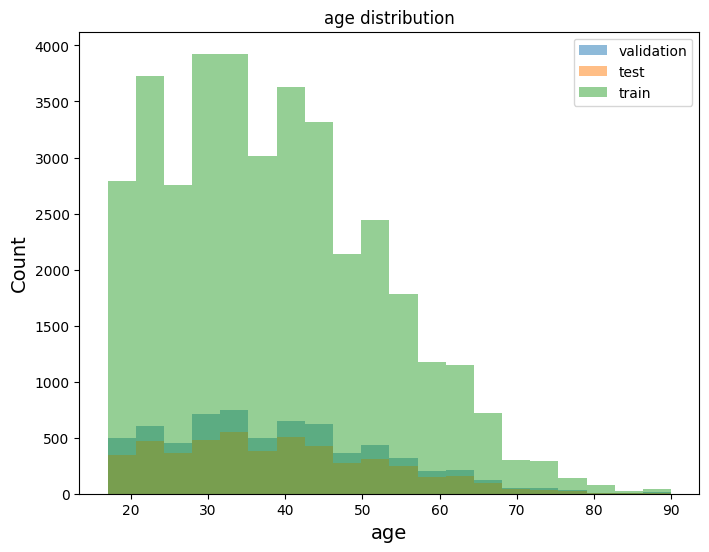

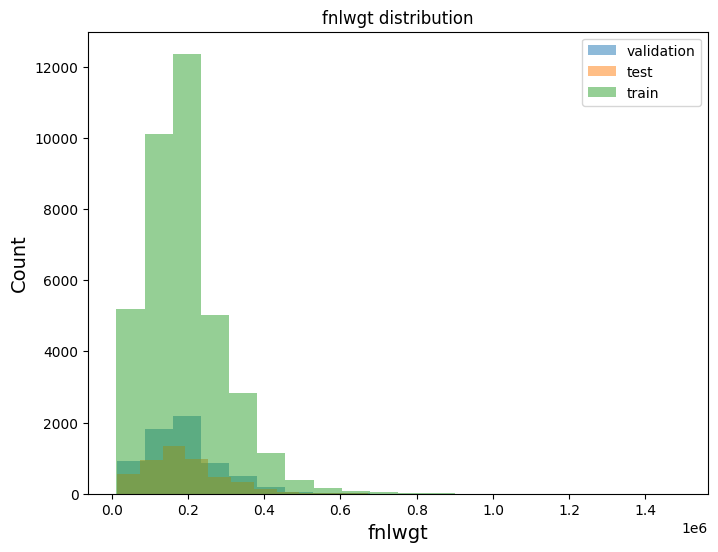

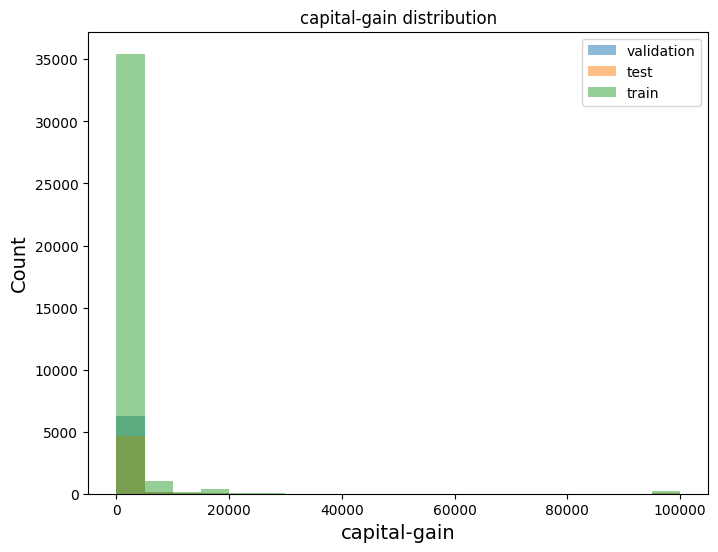

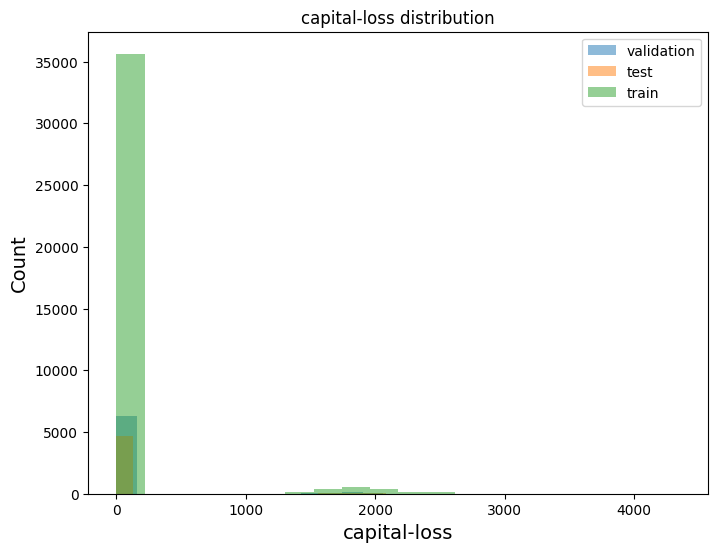

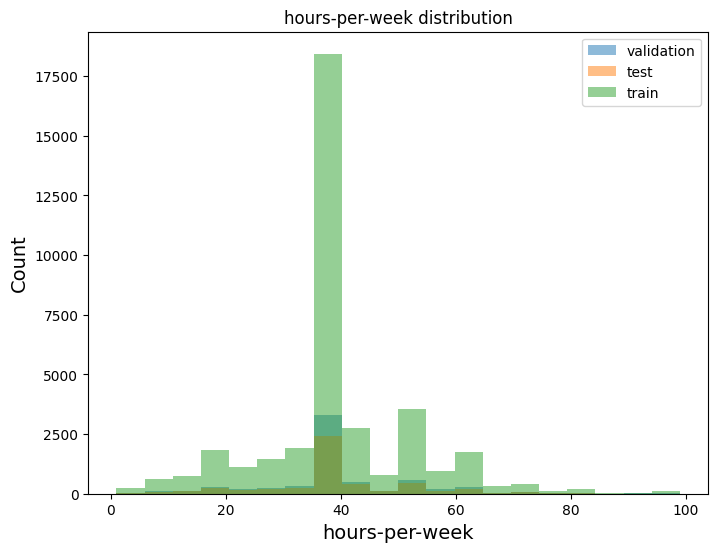

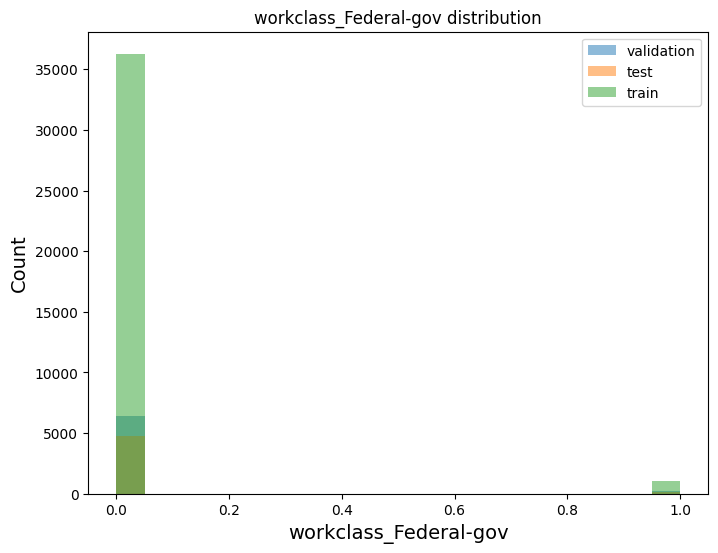

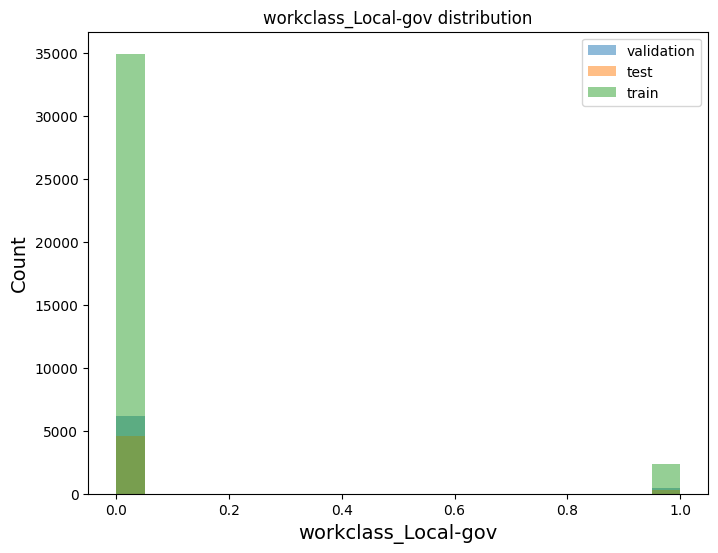

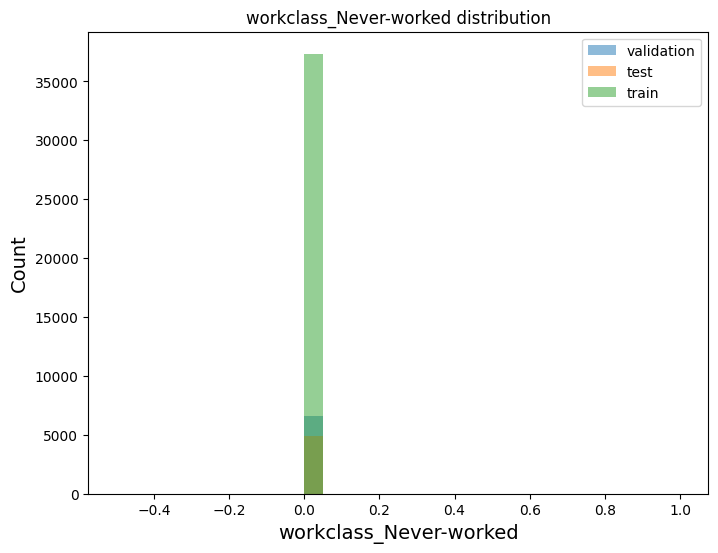

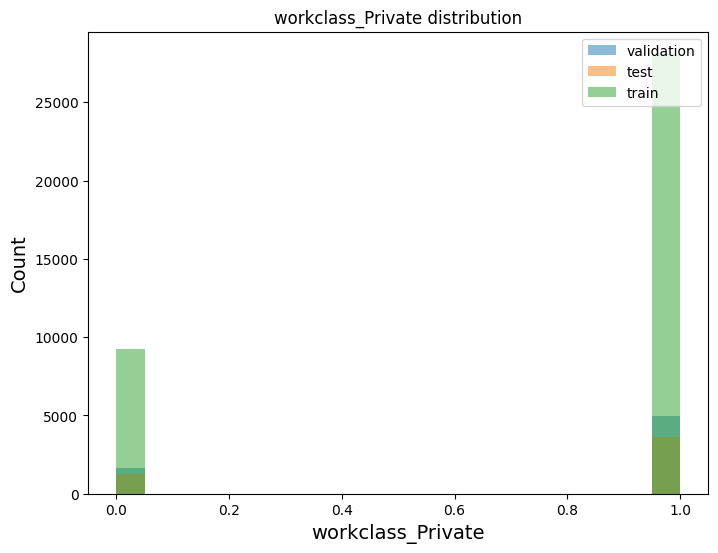

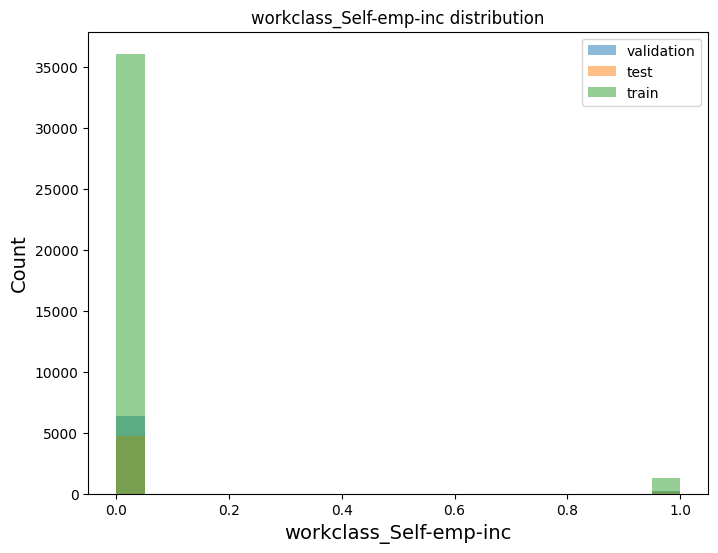

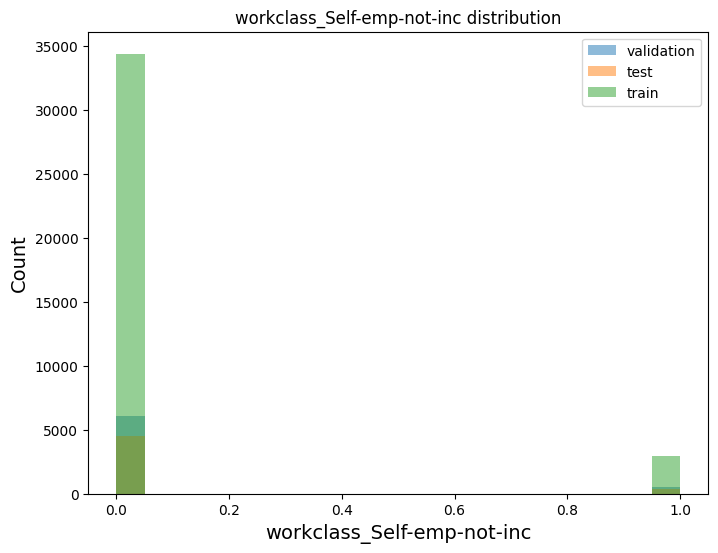

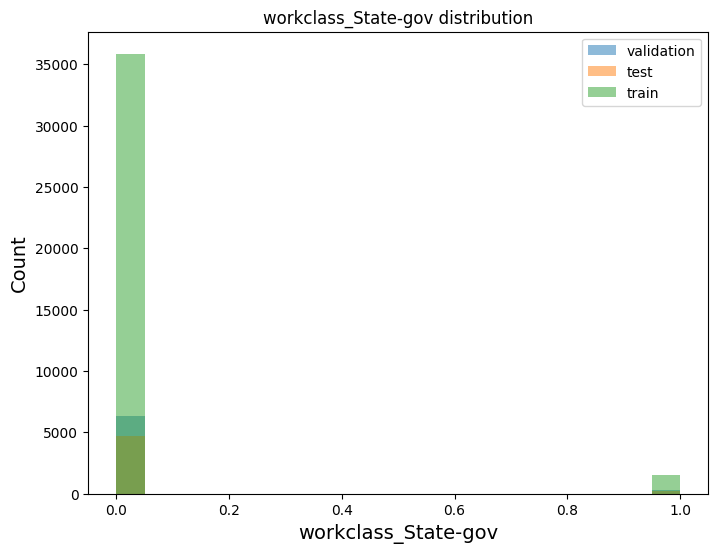

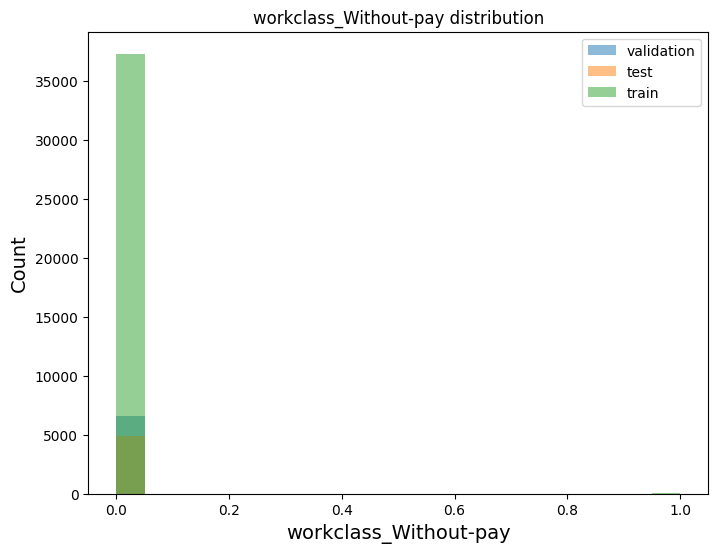

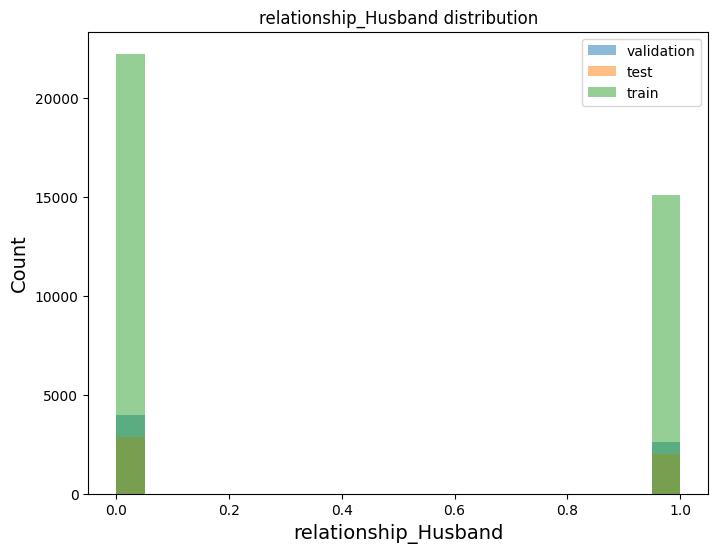

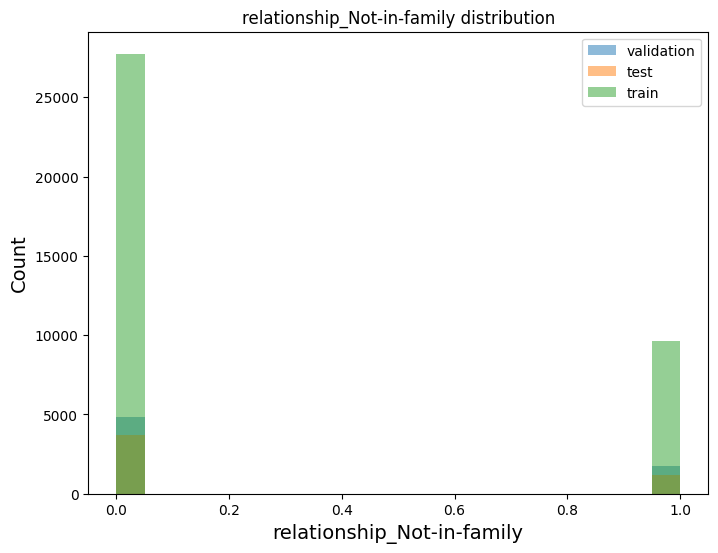

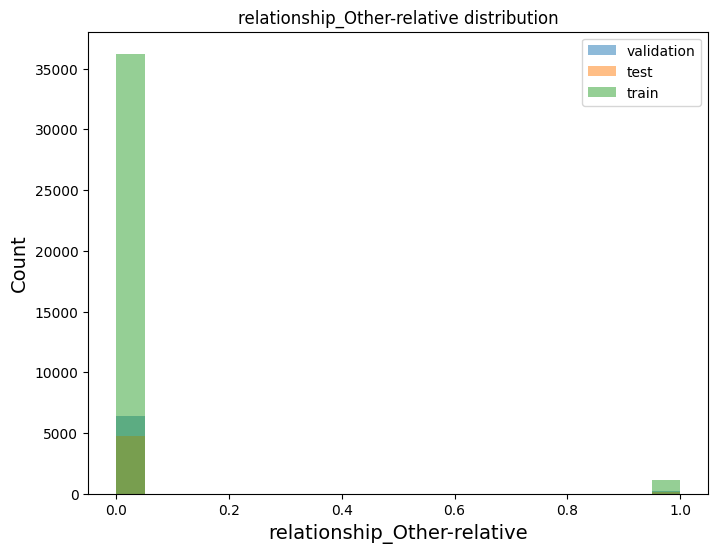

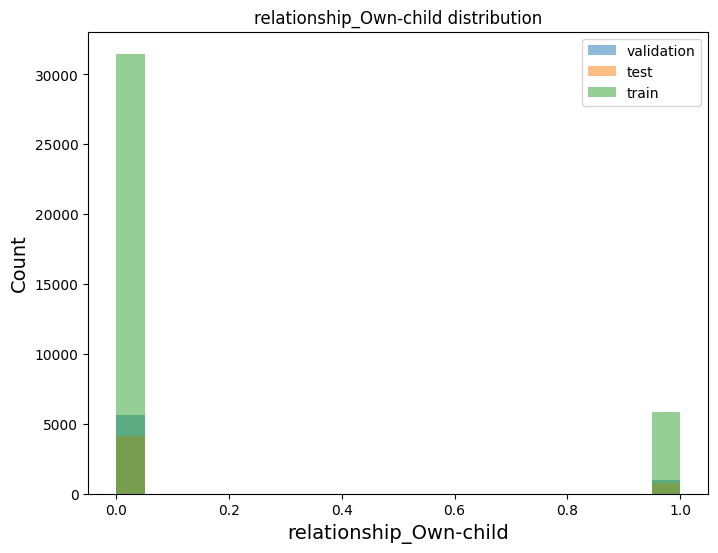

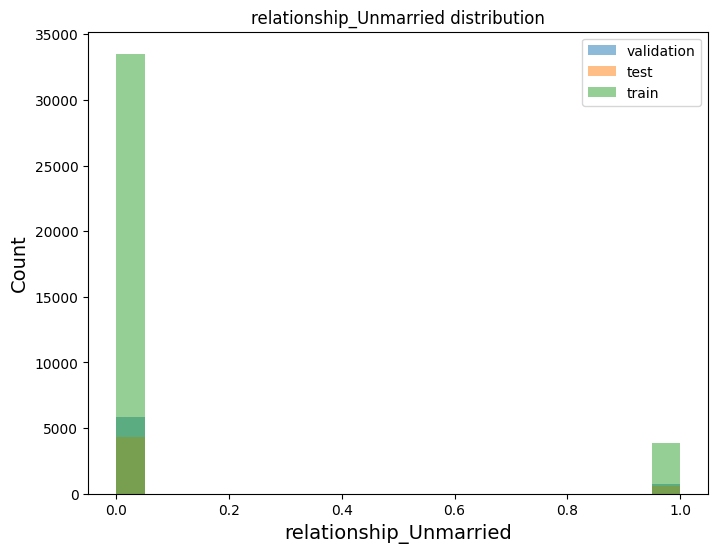

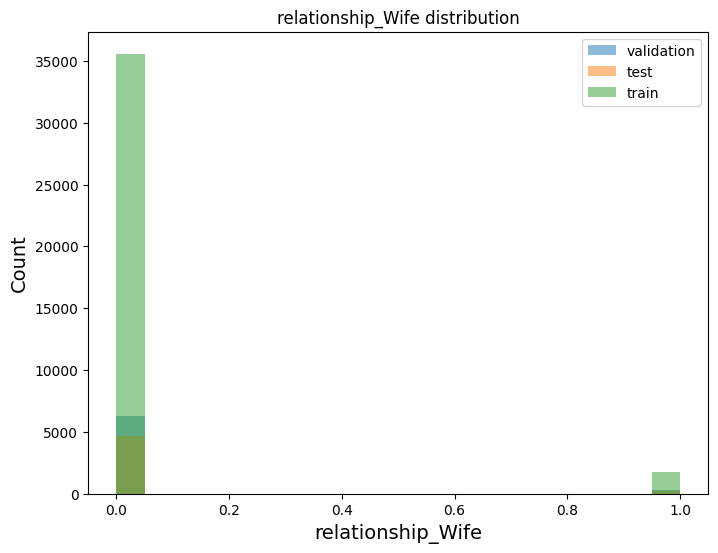

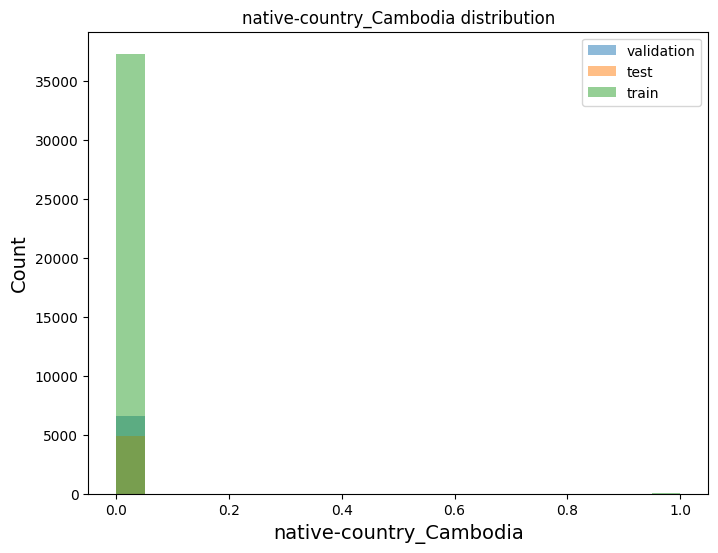

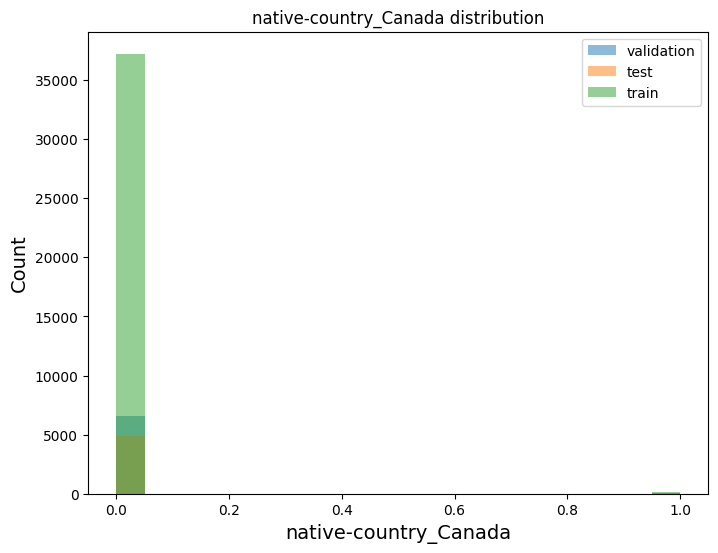

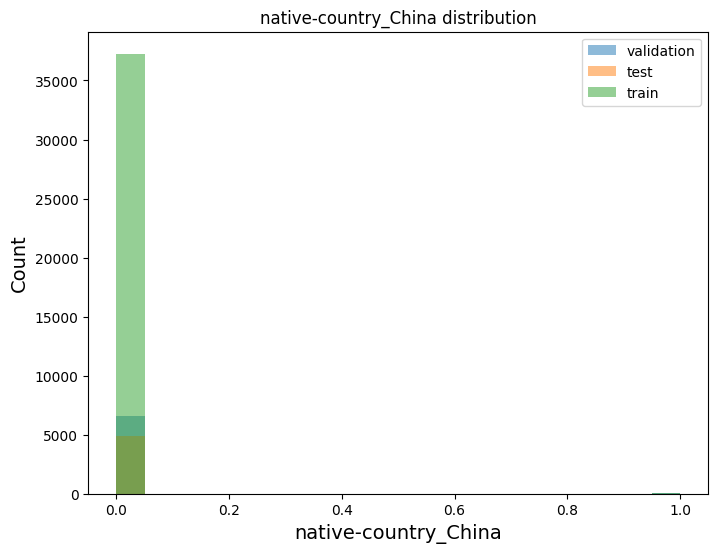

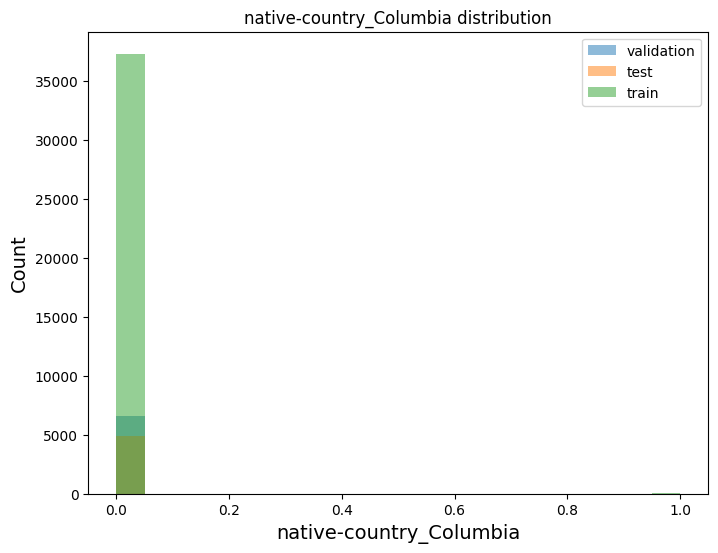

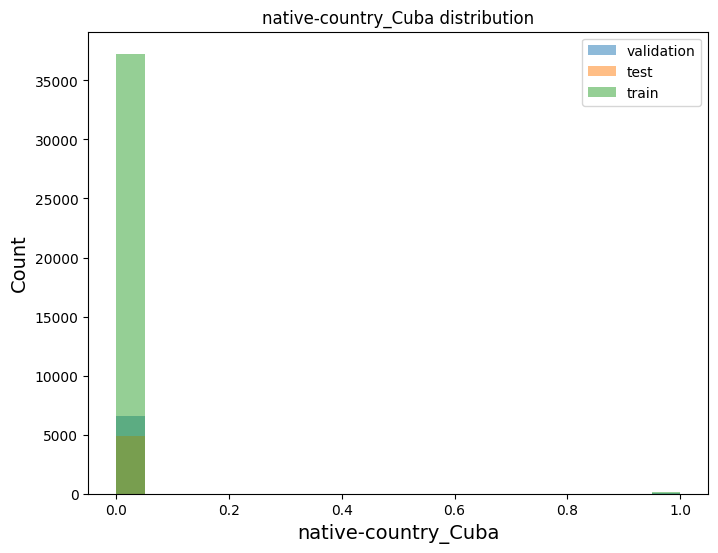

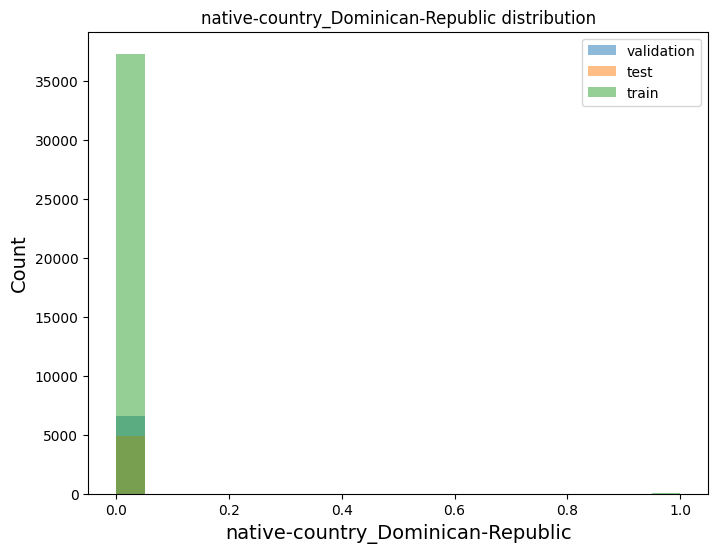

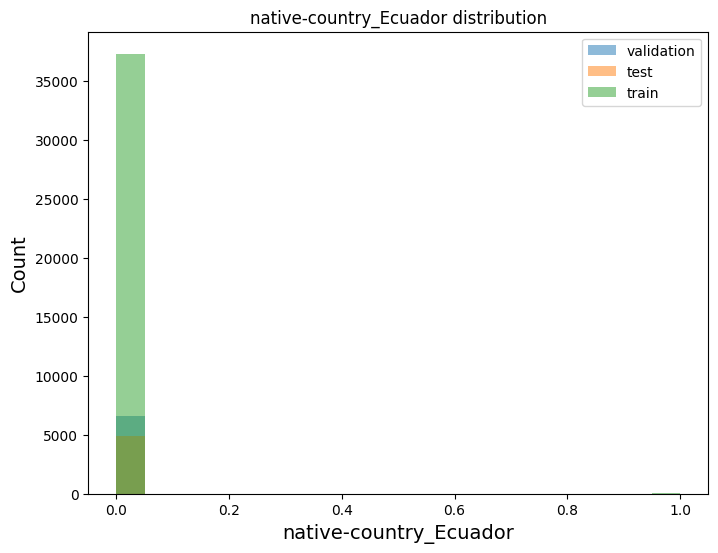

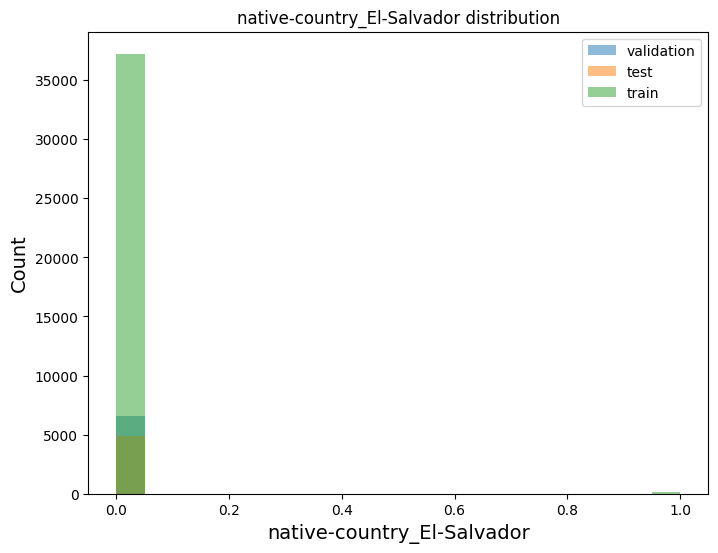

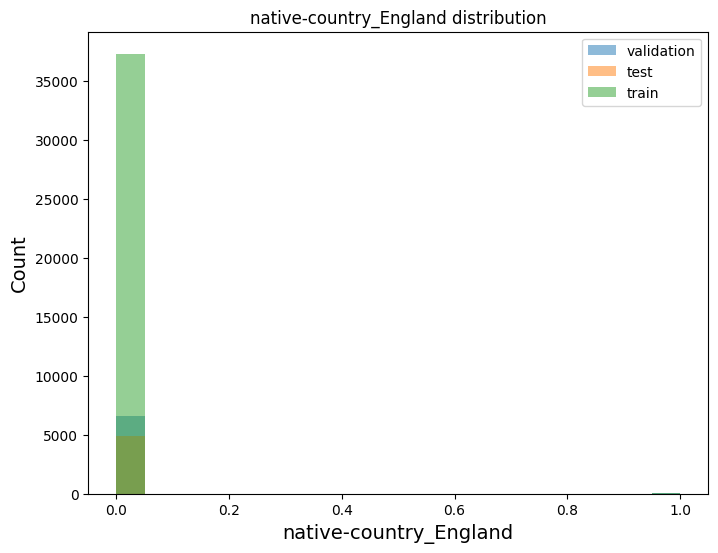

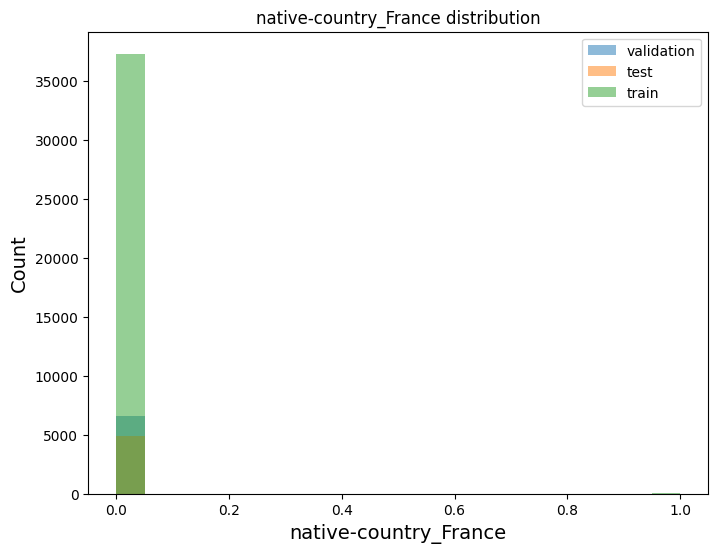

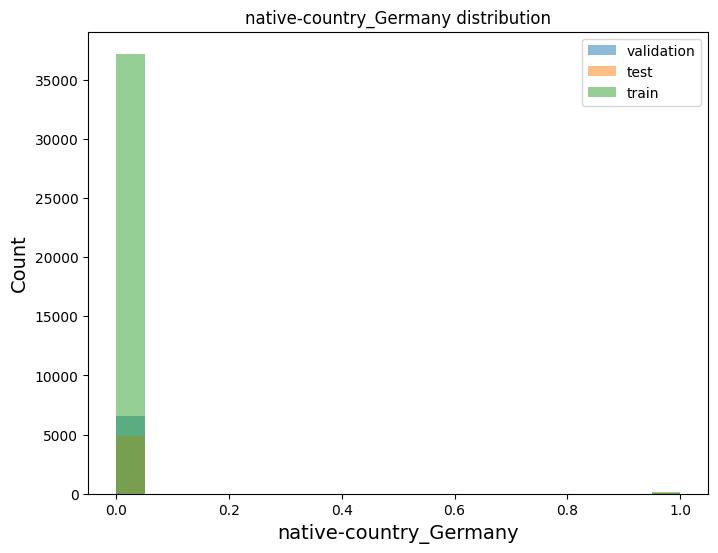

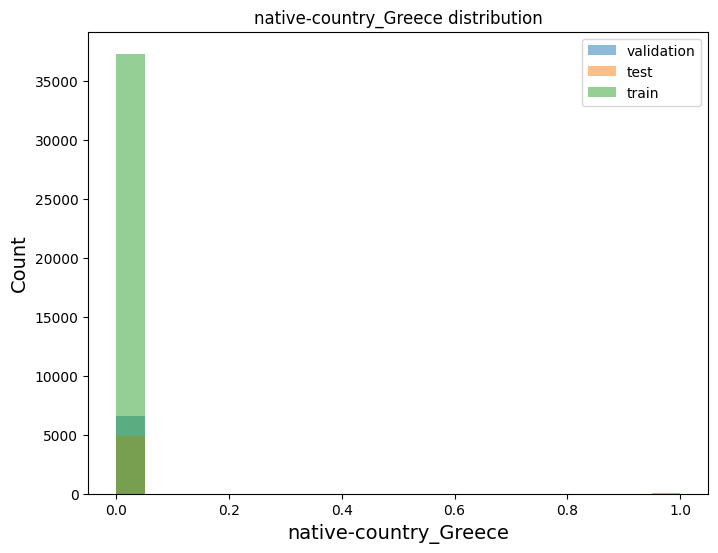

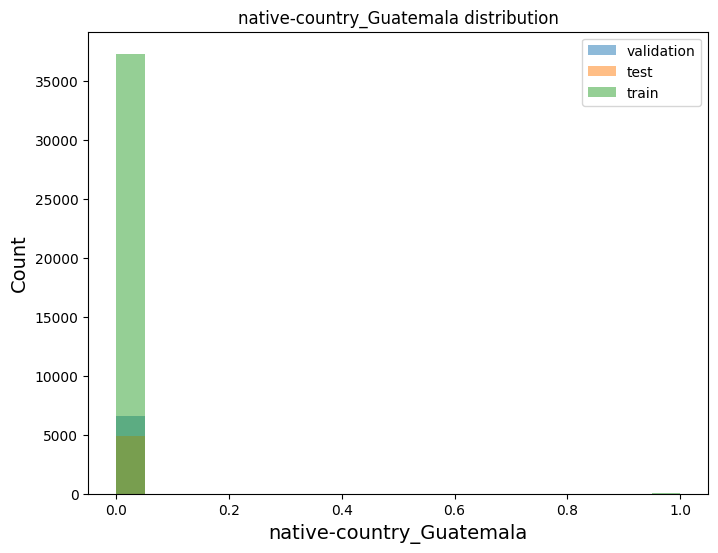

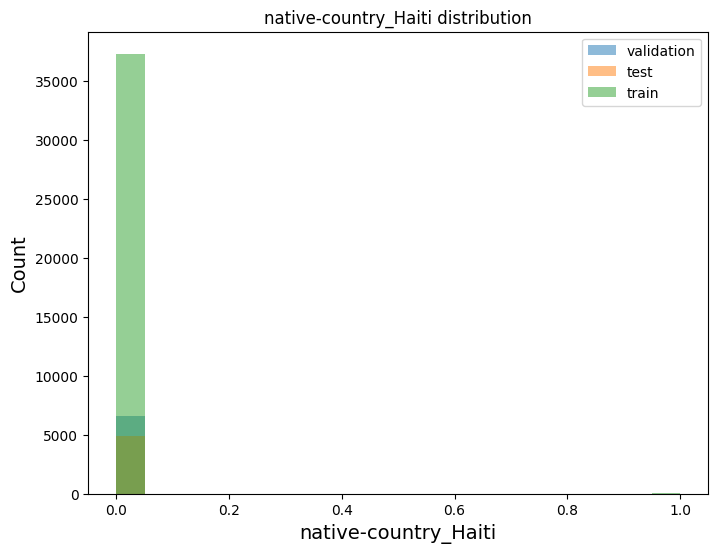

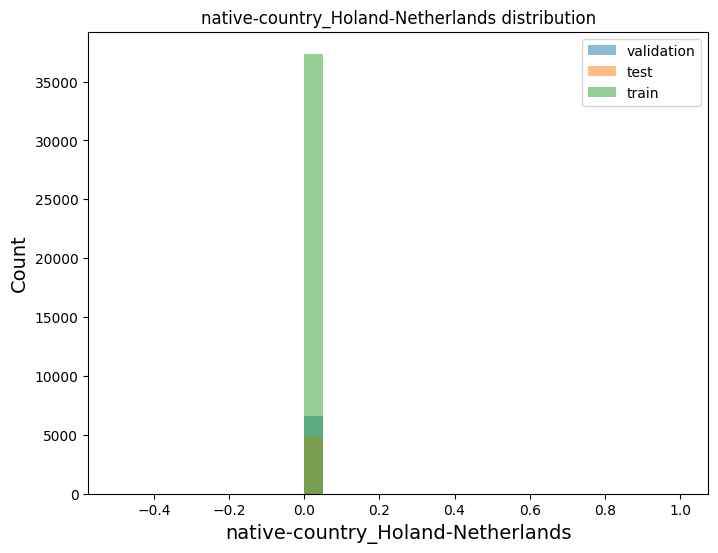

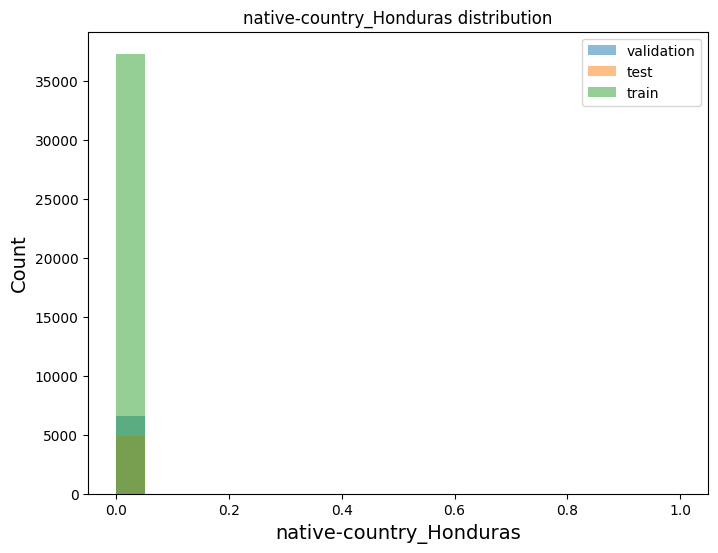

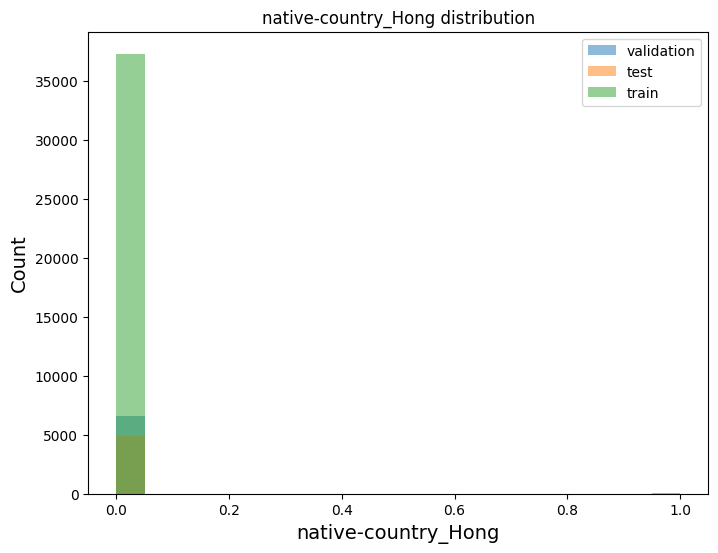

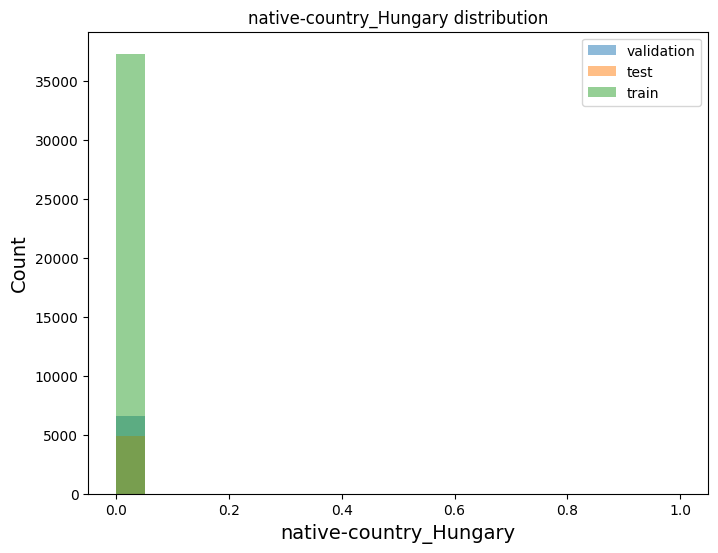

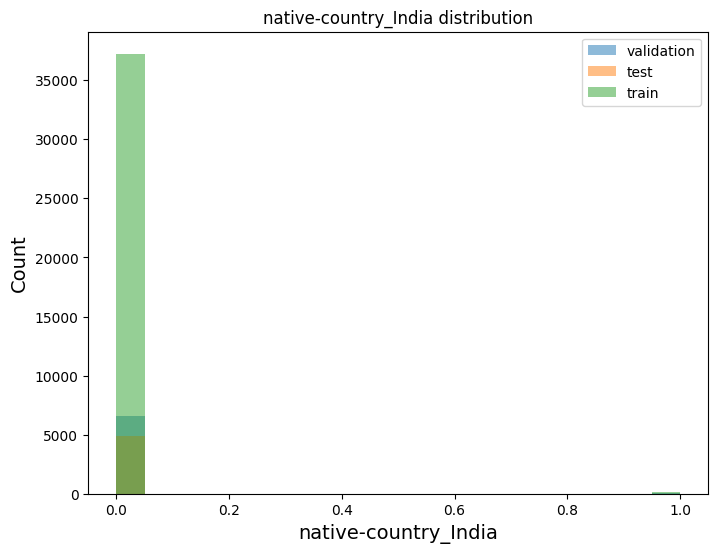

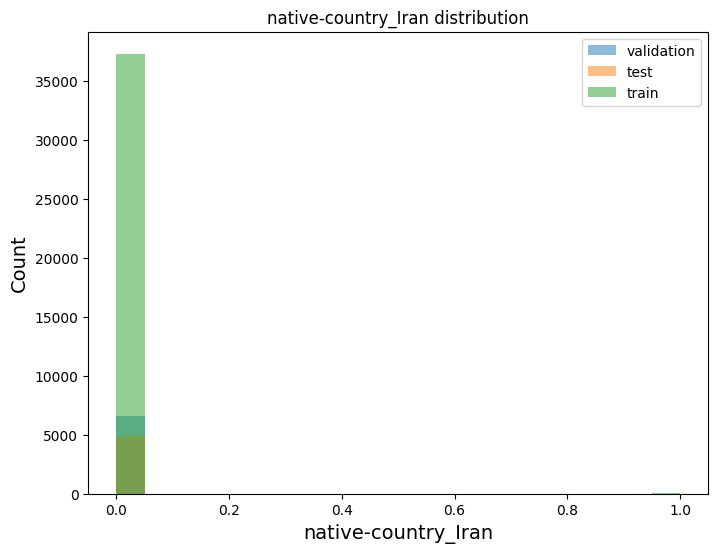

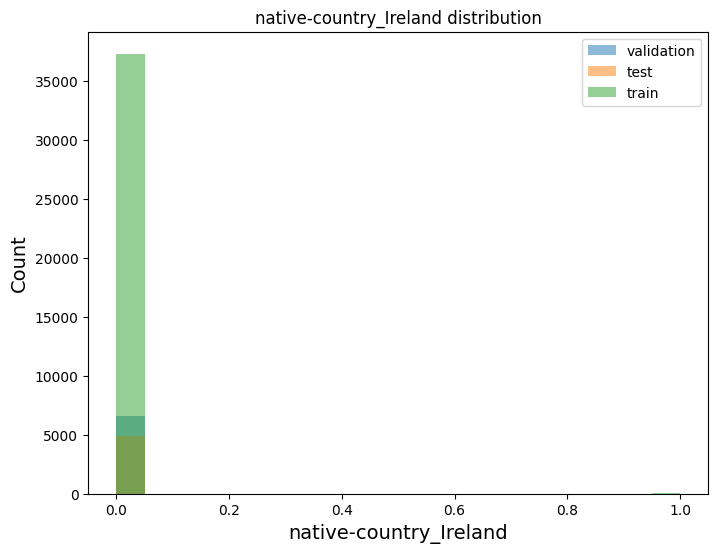

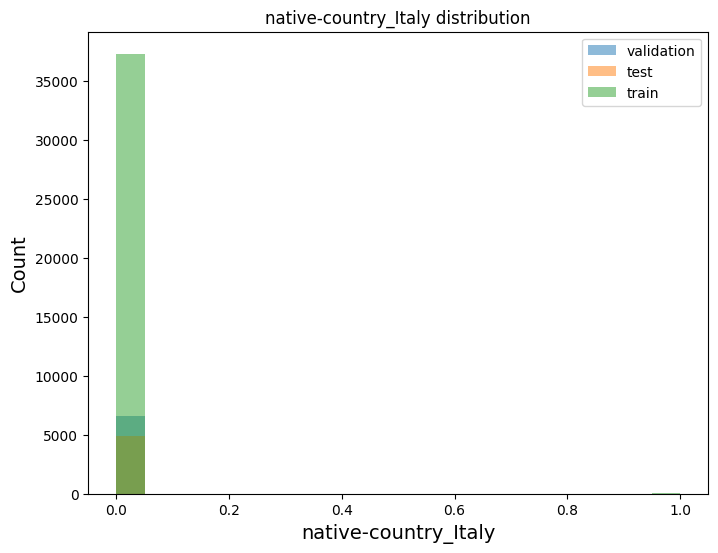

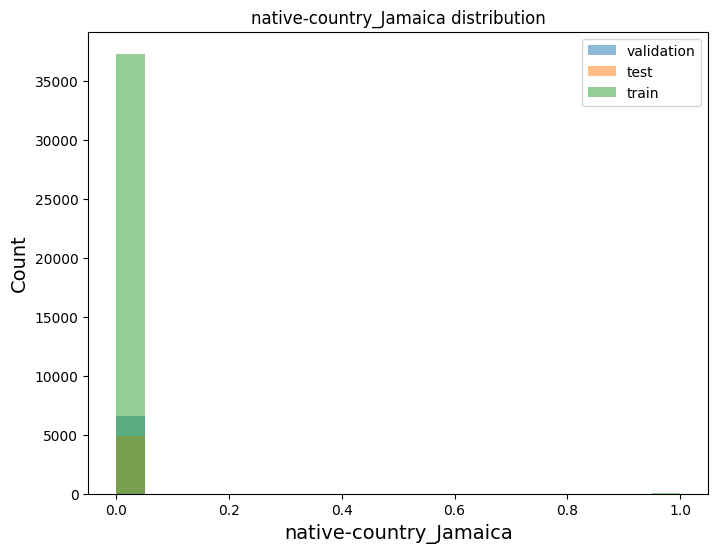

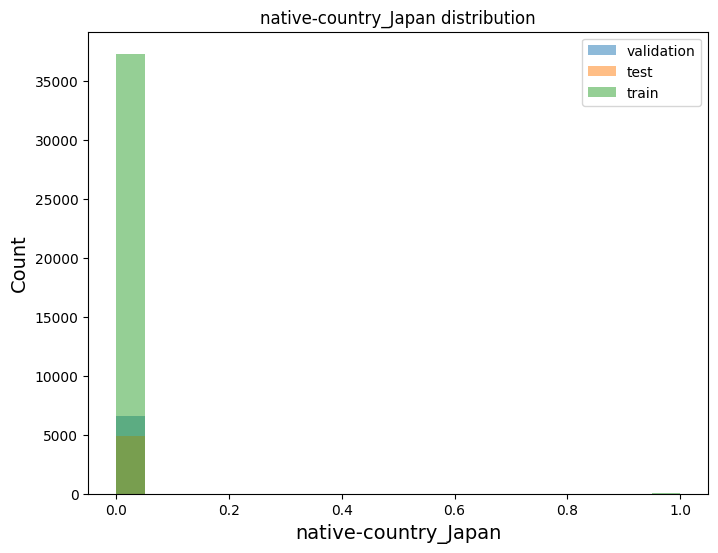

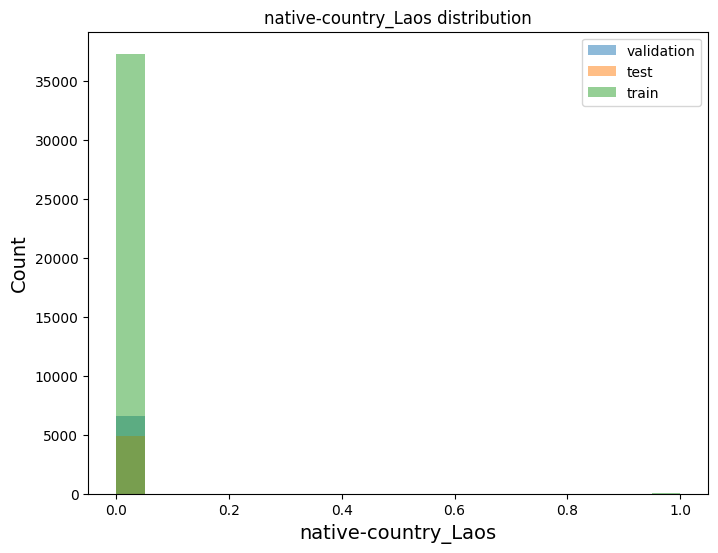

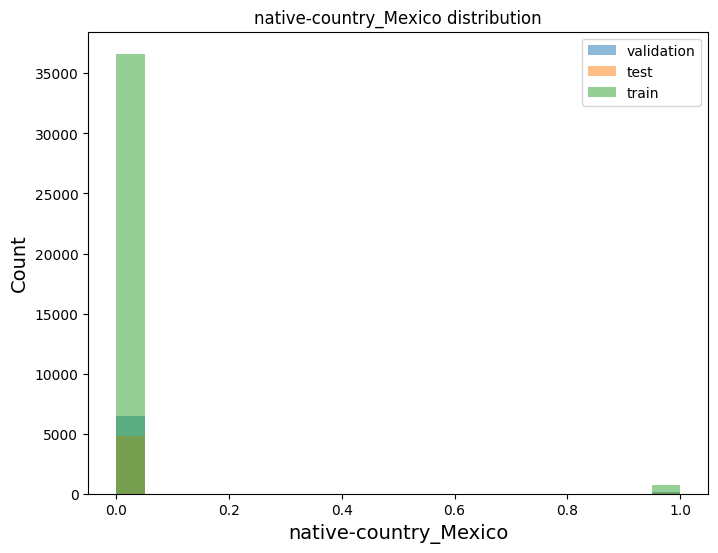

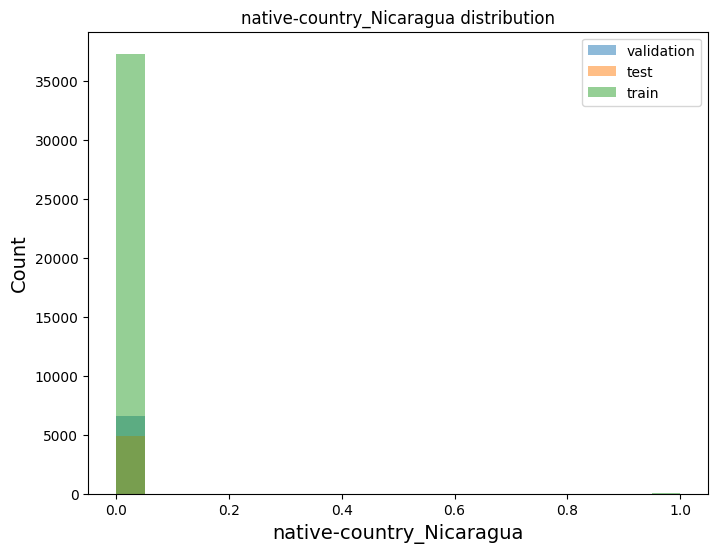

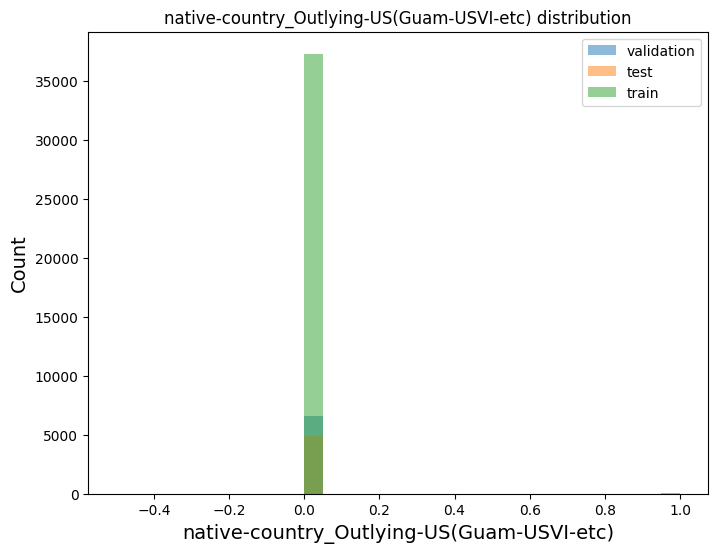

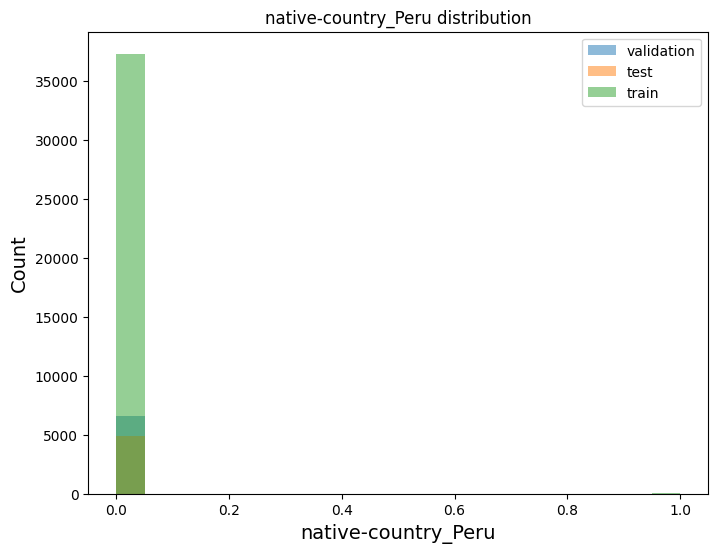

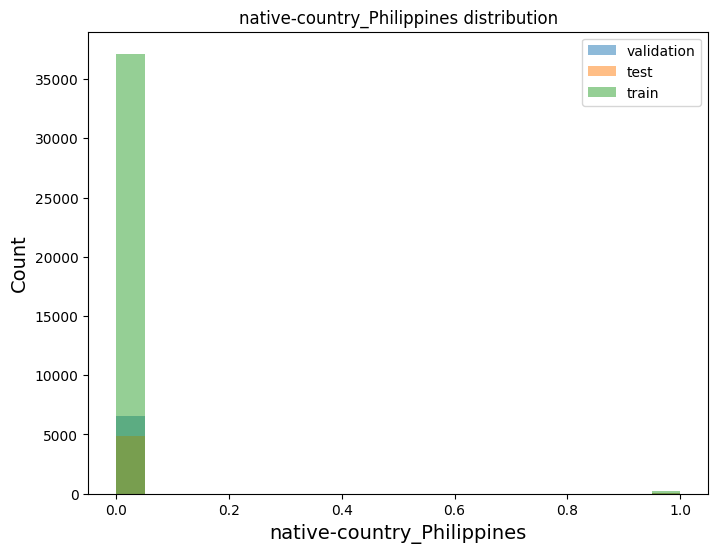

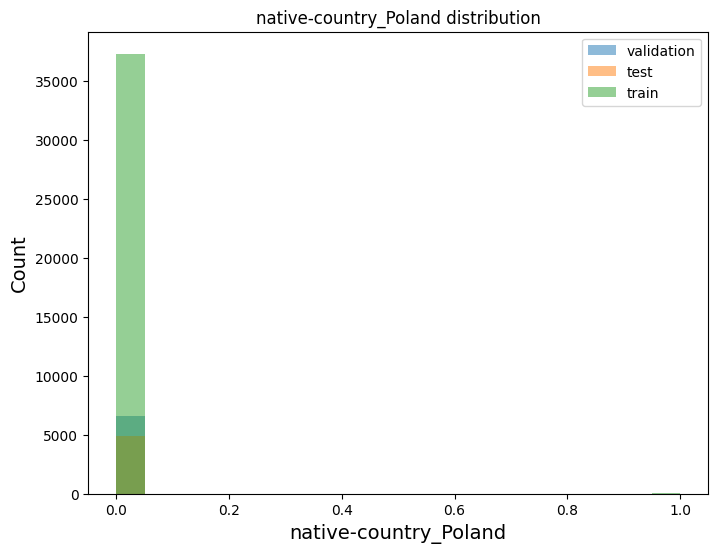

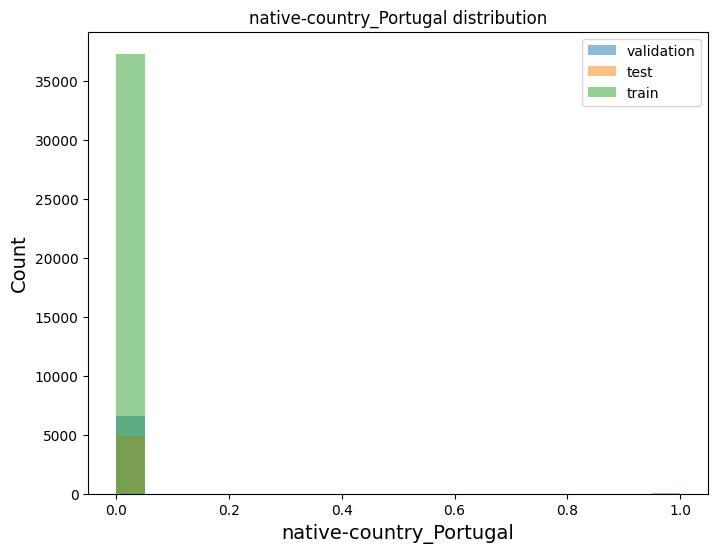

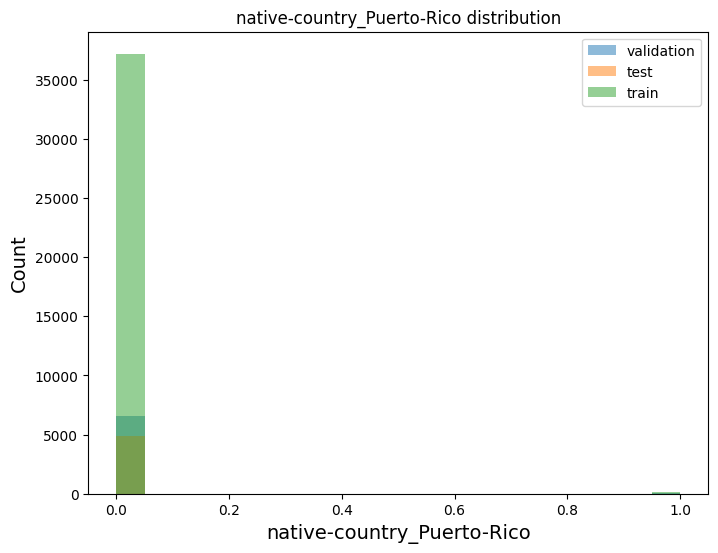

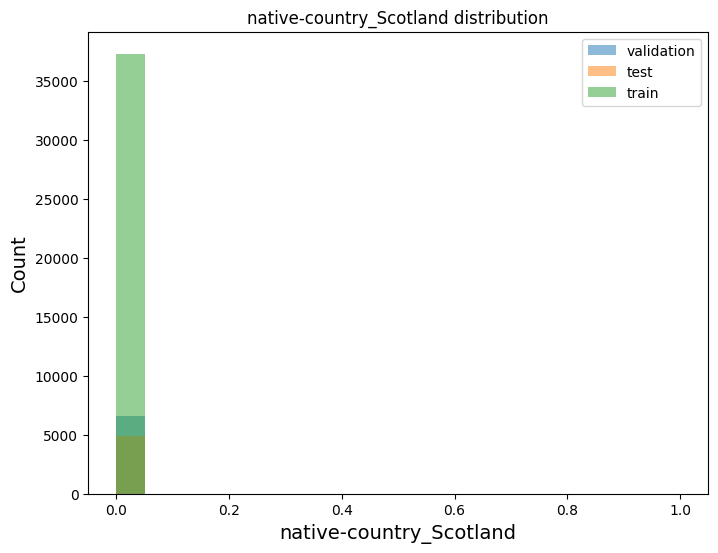

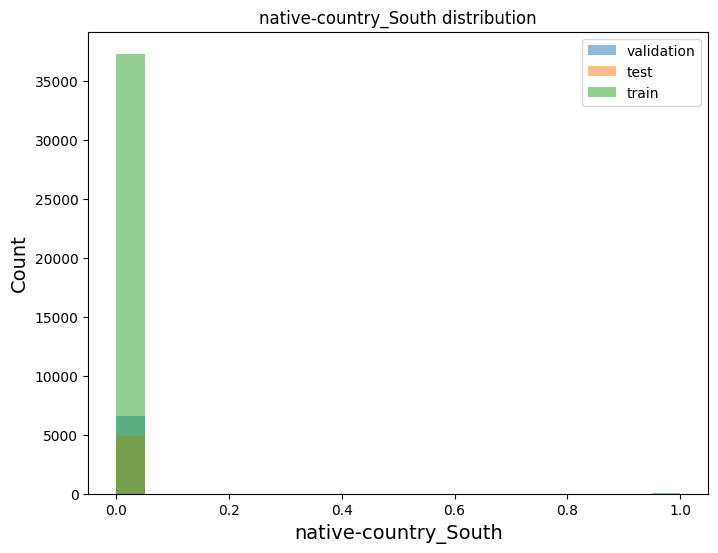

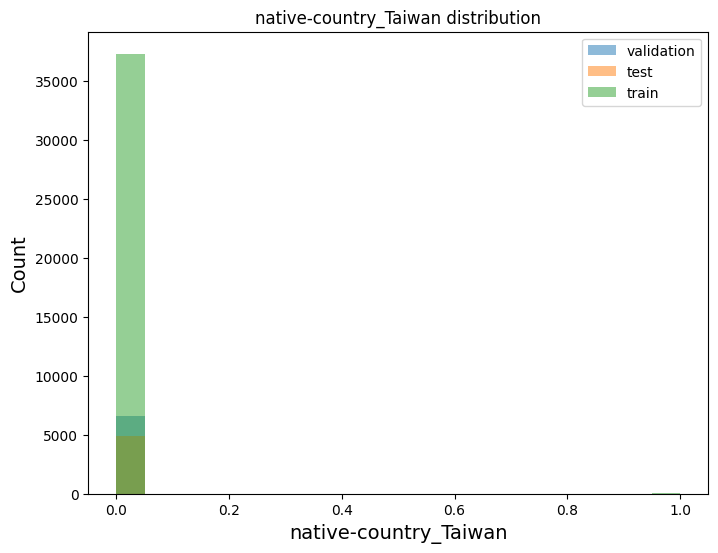

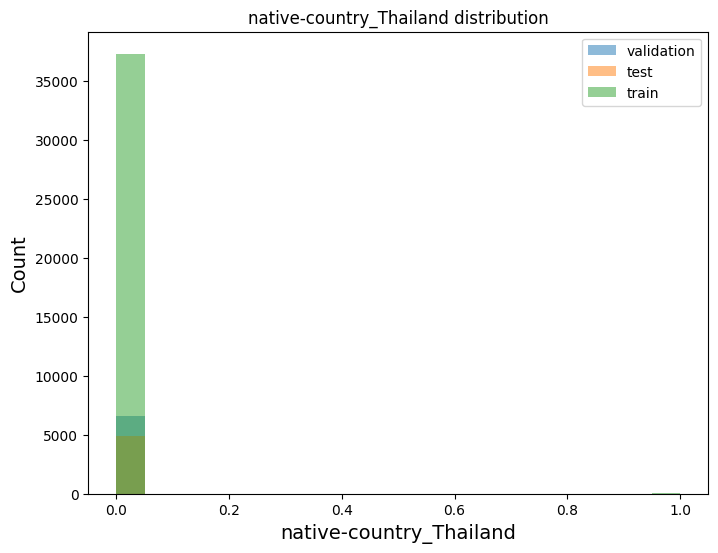

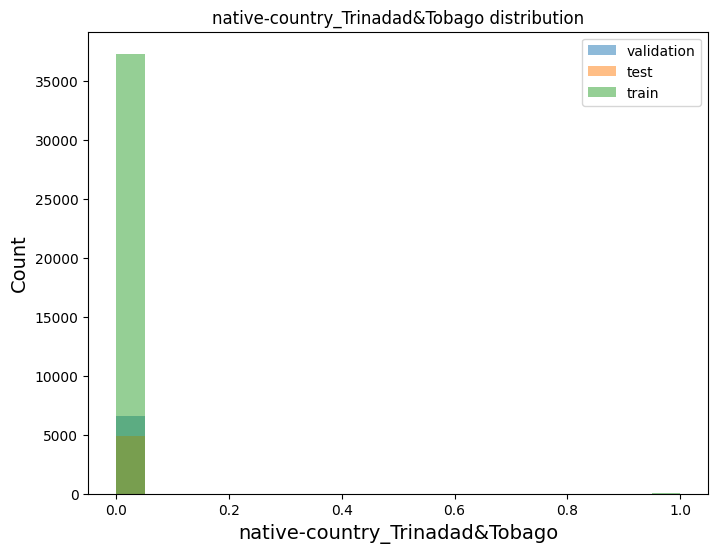

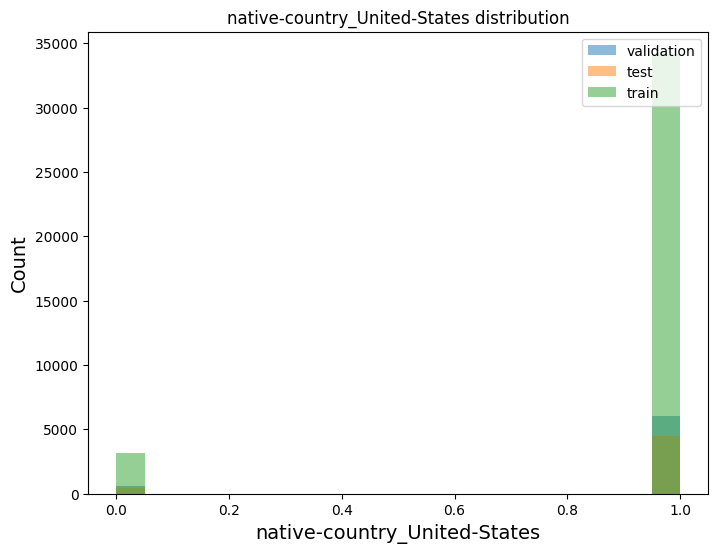

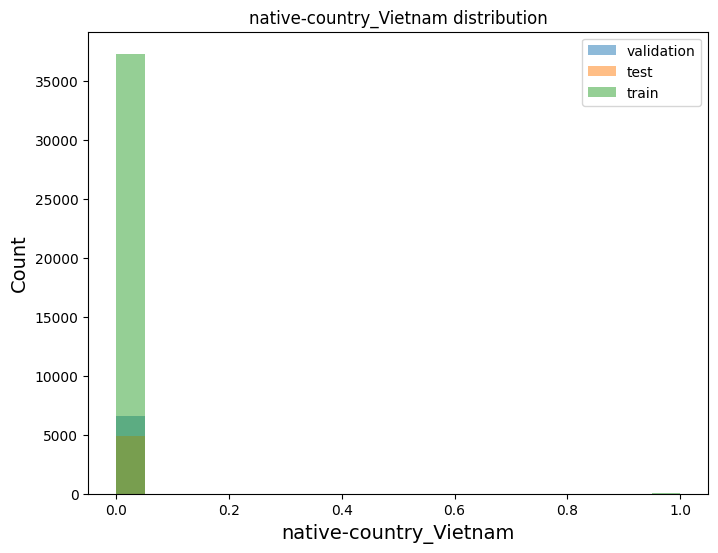

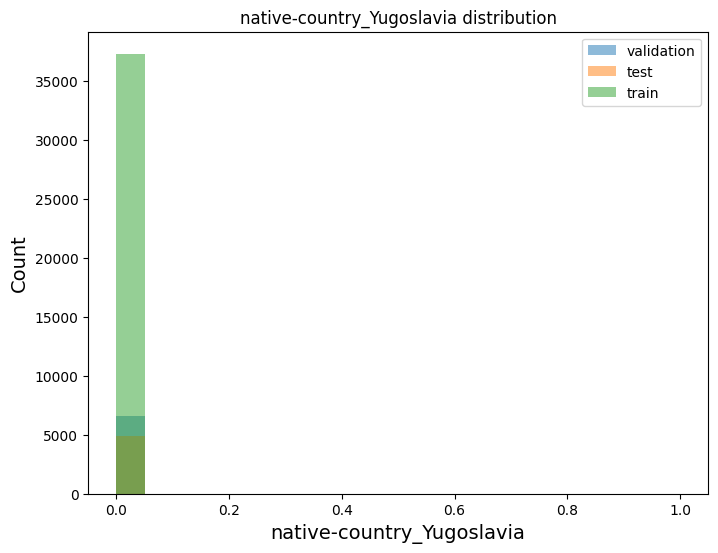

In [35]:
X_test_plot= X_test[[*inde]]
X_val_plot = X_val[[*inde]]
X_train_plot = X_train[[*inde]]
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

# **Classification Model**

## **Test Data Results**
 **Logistic Regression**
*   Mean squared error: 0.23
*   Coefficient of determination: -0.14
*   R^2 score on test set: -0.14
*   Accuracy Score : 0.79467758444217
*   Confusion Matrix : [[3599  136]
 [ 867  283]]

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model

In [37]:
log = linear_model.LogisticRegression()

# Train the model using the training sets
log.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Make predictions using the training set
y_pred = log.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on training set =", r2)

Mean squared error: 0.20
Coefficient of determination: -0.11
R^2 score on training set = -0.10555490254929101


In [39]:
y_pred = log.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.21
Coefficient of determination: -0.14
R^2 score on test set = -0.14071474303009146


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
''' Source: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics '''

0.79467758444217
[[3599  136]
 [ 867  283]]


' Source: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics '

# Understanding the important features



In [41]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=e8cfeec9f6e8f6a7fbcb87140dd85d12b5de933ae82e361431985729c00ab1d0
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [45]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(log, random_state=2).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0578 ± 0.0035,capital-gain
0.0194 ± 0.0030,capital-loss
0 ± 0.0000,workclass_Local-gov
0 ± 0.0000,native-country_England
0 ± 0.0000,native-country_El-Salvador
0 ± 0.0000,native-country_Ecuador
0 ± 0.0000,native-country_Dominican-Republic
0 ± 0.0000,native-country_Cuba
0 ± 0.0000,native-country_Columbia
0 ± 0.0000,native-country_China


#Removing outliers and Checking Model Results

Since, the capital gain is the significant feature and has large outliers. With above graph we can see some small data which is in range of 90000-110000 in capital-gain

Let's use the logistic Regression which makes easier to compare the results

**Test Results**
1. Mean squared error: 0.20
2. Coefficient of determination: -0.12
3. R^2 score on test set = -0.1224406354521641
4. Accuracy : 0.8011216566005177
5. Confusion Matrix : [[3515   54]
 [ 868  199]]

In [47]:
#Removing data above 40000
data = data[data['capital-gain'] <= 40000]

In [54]:
data = data[data['capital-loss'] <= 1000]

In [55]:
from sklearn.model_selection import train_test_split
y,X= data['income'],data[
       [*inde]
    ]

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

In [56]:
log.fit(X_train, y_train)

LogisticRegression()

In [57]:
# Make predictions using the training set
y_pred = log.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on training set =", r2)

Mean squared error: 0.19
Coefficient of determination: -0.10
R^2 score on training set = -0.09968331356038451


In [58]:
y_pred = log.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.20
Coefficient of determination: -0.12
R^2 score on test set = -0.1224406354521641


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
''' Source: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics '''

0.8011216566005177
[[3515   54]
 [ 868  199]]


' Source: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics '

In [53]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(log, random_state=2).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0658 ± 0.0059,capital-gain
0.0198 ± 0.0042,capital-loss
0.0014 ± 0.0030,fnlwgt
0 ± 0.0000,relationship_Own-child
0 ± 0.0000,native-country_France
0 ± 0.0000,native-country_England
0 ± 0.0000,native-country_El-Salvador
0 ± 0.0000,native-country_Ecuador
0 ± 0.0000,native-country_Dominican-Republic
0 ± 0.0000,native-country_Cuba


#Imputation

In [46]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

def remove_randomly(df, percentage):
    """ Randomly removes a percentage of data from the DataFrame. """
    return df.mask(np.random.random(df.shape) < percentage)

def evaluate_imputation(original_df, imputed_df):
    """ Evaluates the imputation by calculating the mean squared error. """
    mse = mean_squared_error(original_df.values, imputed_df.values, squared=False)
    return mse


# Remove 1%, 5%, and 10% of data randomly
data_1 = remove_randomly(data, 0.01)
data_5 = remove_randomly(data, 0.05)
data_10 = remove_randomly(data, 0.10)

# Define the imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
knn_imputer = KNNImputer(n_neighbors=5)

# Apply imputation and evaluate
for removed_data, percentage in zip([data_1, data_5, data_10], [1, 5, 10]):
    print(f"--- Removing {percentage}% of data ---")
    for imputer, name in zip([mean_imputer, median_imputer, knn_imputer], ['Mean', 'Median', 'KNN']):
        imputed_data = pd.DataFrame(imputer.fit_transform(removed_data), columns=data.columns)
        mse = evaluate_imputation(data, imputed_data)
        print(f"{name} Imputation MSE: {mse}")


--- Removing 1% of data ---
Mean Imputation MSE: 205.14885388028884
Median Imputation MSE: 207.37345334116128
KNN Imputation MSE: 217.68777736577667
--- Removing 5% of data ---
Mean Imputation MSE: 411.2860260491621
Median Imputation MSE: 414.41992368827465
KNN Imputation MSE: 446.68436424620546
--- Removing 10% of data ---
Mean Imputation MSE: 600.1457935823508
Median Imputation MSE: 603.3634103193325
KNN Imputation MSE: 640.4100670660991


# Answering the Questions

**Which independent variables have missing data? How much?**
1.   workclass = 963
2.   occupation = 966
3.   native-country = 274

**In the predictor variables independent of all the other predictor variables?**

> No, they're dependent on each other. This is shown in pain plot in [Correlation](#Correlation)








**What are the data types? (Only numeric and categorical)**

> Data Types :int64(*6 columns*), object(*8 columns*)

**Are there missing values?**
> Yes, There are missing values in 3 columns. in
-  workclass         2799
-  occupation        2809
-  native-country     857


**What are the likely distributions of the numeric variables?**

> Most numerical variable are not having the similar distribution, some are highly skewed, some are slightly like normal distribution


**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

1. capital-gain
2. capital-loss
3. Workclass
4. Fnlwgt
5. Age
6. Native-country

Do the training and test sets have the same data?
> Yes, most of the data are similar but the data points in training set are not included in train and validation data set.

**Which predictor variables are the most important?**

1. capital-gain
2. capital-loss
3. Workclass
4. Fnlwgt
5. Age
6. Native-country

**Do the ranges of the predictor variables make sense?**

> Yes, Census data are usually different and diverse than any other dataset. It also depends upon the data collection.

What are the distributions of the predictor variables?

1.   **Age** - It might resemble a normal distribution, the heavier tails suggest that the overall distribution of age in this dataset is not perfectly normal.
2.   **Fnlwgt** - The distribution is heavily right-skewed which means that the bulk of the data is concentrated on the left with a long tail stretching to the right. It seems like a Logarithamic distibution.
3.   **Education-num** - It is not a normal distribution but the variable is not continuous but categorical with an order.
4.   **Capital-gain** - This distribution is highly right-skewed with many outliers at the higher end.
5.   **Capital-loss** - It is similar to Capital gain but has high outliers
6.   **Hours-per-week** - The distribution bit similar like normal but not perfectly normal.



**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

>Yes, There is a small improvement in accuracy of 0.007 after removing the outliers in capital-gain and capital-loss

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

> --- Removing 1% of data ---
Mean Imputation MSE: 205.14885388028884
Median Imputation MSE: 207.37345334116128
KNN Imputation MSE: 217.68777736577667


> --- Removing 5% of data ---
Mean Imputation MSE: 411.2860260491621
Median Imputation MSE: 414.41992368827465
KNN Imputation MSE: 446.68436424620546

>--- Removing 10% of data ---
Mean Imputation MSE: 600.1457935823508
Median Imputation MSE: 603.3634103193325
KNN Imputation MSE: 640.4100670660991


#Refernces
1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. Pandas Documentation
The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation

#License
#MIT License

Copyright (c) 2024 Work

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.